max:  149.0 , min:  -301.0
Первый момент времени, когда на прогулке было сделано более 10 шагов в одну сторону, равен 1
Максимальное количество шагов в одну сторону - 450 . Значение индекса, с которого будет сделано максимальное количество шагов в одну сторону, - 550


ValueError: x and y must have same first dimension, but have shapes (451,) and (450,)

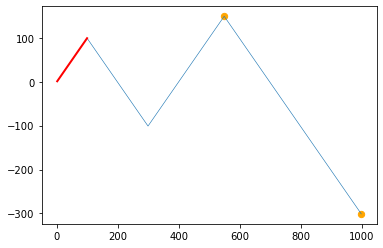

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#Я создаю массив из (-1) и 1, а потом добавляю к массиву 0 (таким образом задаю начальную точку шагов, не меняя сгенерированный список)
np.random.seed(42)


### ошибочный код для сборки случайных чисел нужно использовать  lst  =np.random.choice([-1,1], 1000)
### затем заменить 0-ой элемент lst[0] = 0

vector = np.random.randint(-1,1,1000)
for i in range(0,len(vector)): #создаем массив с -1, 1
    if vector[i] == 0:
        vector[i] = 1
        i = i + 1  
vectorCumSum = np.cumsum(vector) # накапливаем число шагов
vector1 = np.insert(vectorCumSum, 0, 0)# вставляем 0 в массив 


### мой тест

my_list = np.zeros(1000)
my_list[1:100] = 1
my_list[100:300] = -1
my_list[300:550] = 1
my_list[550:1000] = -1

mu_list_cum = np.cumsum(my_list)
mu_list_cum


vector1 = mu_list_cum
vector = my_list

### и графика сломалась


# ответ на пункт 1
print('max: ', np.max(vector1), ', min: ', np.min(vector1), sep = ' ' ) 
plt.plot(vector1,linewidth = 0.6)
for i in range(0,len(vector1)):
    if vector1[i] == np.max(vector1):
        plt.scatter(i, vector1[i], color='orange', s=40, marker='o')
    else:
        if vector1[i] == np.min(vector1):
            plt.scatter(i, vector1[i], color='orange', s=40, marker='o')
        else:
            continue
            
# ответ на пункт 2
b = g = 0 # назначаем 0 на случаи, когда не существует такого диапазона, когда мы проходим больше значения с 
a = 1 # счетчик №1
d = 1 # счетчик №2
c = 10 # величина шага для пункта (2)
for i in range(1,len(vector)):
    if vector[i-1] == vector[i]:
        a = a + 1 
        if a > c: 
            b = i - c
            g = i
            break
        else:
            continue
    else: 
        a = 1
        continue
if b == g - c :
    print('Первый момент времени, когда на прогулке было сделано более %g шагов в одну сторону, равен'%c, b )
    for i in range((b+2),len(vector1)): # находим конец промежутка
        if abs(vector1[i]) > abs(vector1[i-1]) :
            end = i
        else:
            break
    vectorNewFor10 = vector1[b:end+1]
    plt.plot(list(np.arange(b, (end + 1), 1)),vectorNewFor10, color='red',linewidth = 2)
    plt.show
else:
    print('На данном диапазоне нет момента времени, когда произведено более 10 шагов в одну сторону')
index = 0   
# ответ на пункт 3
for k in range(1,len(vector)):
    if vector[k-1] == vector[k]:
        a = a + 1 
        if a > d:
            d = a
            index = k
        else: 
            continue
    else:
        a = 1
print('Максимальное количество шагов в одну сторону -', d,'. Значение индекса, с которого будет сделано максимальное количество шагов в одну сторону, -', (index + 1 - d) )
vectorNewForMAX= vector1[(index + 1 - d):(index + 2 )] # (+2) тк в предыдущем цикле мы брали вектор без 0 впереди, а сейчас берем значения из вентора с 0
plt.plot(list(np.arange(index + 1 - d, index + 2, 1)),vectorNewForMAX,color='blue',linewidth = 1)
fig = plt.gcf() # увеличиваем изображение
fig.set_size_inches(10.5, 6.5) 
fig.savefig('test2png.png', dpi=100) 
fig = plt.figure()